In [1]:
import pandas as pd
import sqlite3
import numpy as np

In [2]:
bom_movie_gross = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
rt_movie_info = pd.read_csv("zippedData/rt.movie_info.tsv.gz", sep='\t')
rt_reviews = pd.read_csv("zippedData/rt.reviews.tsv.gz", sep='\t', encoding='windows-1252')
tmdb_movies = pd.read_csv("zippedData/tmdb.movies.csv.gz")
tn_movie_budgets = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")

In [3]:
conn = sqlite3.connect("zippedData/im.db")
cur = conn.cursor()

In [4]:
df_movies = pd.read_sql_query("""SELECT * 
                  FROM movie_basics mb, movie_ratings mr
                  where mb.movie_id = mr.movie_id
                  """, conn)

In [5]:
df_movies

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,6.5,119
...,...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,tt9913084,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",tt9914286,8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,tt9914642,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,tt9914942,6.6,5


In [6]:
df_movies['numvotes'].describe().round()

count      73856.0
mean        3524.0
std        30294.0
min            5.0
25%           14.0
50%           49.0
75%          282.0
max      1841066.0
Name: numvotes, dtype: float64

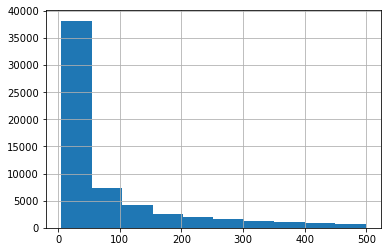

In [8]:
df_movies[df_movies['numvotes'] < 500]['numvotes'].hist();

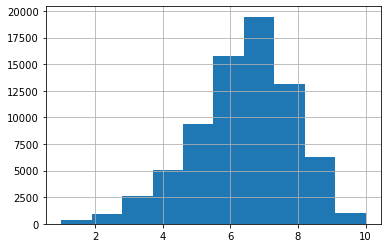

In [9]:
df_movies['averagerating'].hist();

## BOM

In [10]:
bom_movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [11]:
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [12]:
#values contain commas which cannot be converted to floats
bom_movie_gross['foreign_gross'] = bom_movie_gross['foreign_gross'].str.replace(',', '')

In [13]:
bom_movie_gross['foreign_gross'] = bom_movie_gross['foreign_gross'].astype(float)

In [14]:
bom_movie_gross[bom_movie_gross['title'] == 'Toy Story 3']

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010


In [15]:
bom_movie_gross['domestic_gross'].describe().round()

count         3359.0
mean      28745845.0
std       66982498.0
min            100.0
25%         120000.0
50%        1400000.0
75%       27900000.0
max      936700000.0
Name: domestic_gross, dtype: float64

In [16]:
# highest domestic grossing movie
bom_movie_gross[bom_movie_gross['domestic_gross'] == bom_movie_gross['domestic_gross'].max()]

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,1131.6,2015


In [17]:
bom_movie_gross[bom_movie_gross['foreign_gross'].isna()]

,title,studio,domestic_gross,foreign_gross,year
222,Flipped,WB,1800000.0,NaN,2010
254,The Polar Express (IMAX re-issue 2010),WB,673000.0,NaN,2010
267,Tiny Furniture,IFC,392000.0,NaN,2010
269,Grease (Sing-a-Long re-issue),Par.,366000.0,NaN,2010
280,Last Train Home,Zeit.,288000.0,NaN,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [18]:
bom_movie_gross[bom_movie_gross['domestic_gross'].isna()]

,title,studio,domestic_gross,foreign_gross,year
230,It's a Wonderful Afterlife,UTV,NaN,1300000.0,2010
298,Celine: Through the Eyes of the World,Sony,NaN,119000.0,2010
302,White Lion,Scre.,NaN,99600.0,2010
306,Badmaash Company,Yash,NaN,64400.0,2010
327,Aashayein (Wishes),Relbig.,NaN,3800.0,2010
537,Force,FoxS,NaN,4800000.0,2011
713,Empire of Silver,NeoC,NaN,19000.0,2011
871,Solomon Kane,RTWC,NaN,19600000.0,2012
928,The Tall Man,Imag.,NaN,5200000.0,2012
933,Keith Lemon: The Film,NaN,NaN,4000000.0,2012


In [19]:
bom_movie_gross = bom_movie_gross.replace(np.nan, 0)

In [20]:
bom_movie_gross['total_gross'] = bom_movie_gross['domestic_gross'] + bom_movie_gross['foreign_gross']

In [21]:
# make sure large numbers display properly
pd.options.display.float_format = '{:.2f}'.format

In [22]:
bom_movie_gross

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.00,652000000.00,2010,1067000000.00
1,Alice in Wonderland (2010),BV,334200000.00,691300000.00,2010,1025500000.00
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00,664300000.00,2010,960300000.00
3,Inception,WB,292600000.00,535700000.00,2010,828300000.00
4,Shrek Forever After,P/DW,238700000.00,513900000.00,2010,752600000.00
...,...,...,...,...,...,...
3382,The Quake,Magn.,6200.00,0.00,2018,6200.00
3383,Edward II (2018 re-release),FM,4800.00,0.00,2018,4800.00
3384,El Pacto,Sony,2500.00,0.00,2018,2500.00
3385,The Swan,Synergetic,2400.00,0.00,2018,2400.00


In [32]:
bom_movie_gross.sort_values('total_gross', ascending=False)

,title,studio,domestic_gross,foreign_gross,year,total_gross
727,Marvel's The Avengers,BV,623400000.00,895500000.00,2012,1518900000.00
1875,Avengers: Age of Ultron,BV,459000000.00,946400000.00,2015,1405400000.00
3080,Black Panther,BV,700100000.00,646900000.00,2018,1347000000.00
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.00,960500000.00,2011,1341500000.00
2758,Star Wars: The Last Jedi,BV,620200000.00,712400000.00,2017,1332600000.00
...,...,...,...,...,...,...
3078,2:22,Magn.,400.00,0.00,2017,400.00
2756,News From Planet Mars,KL,300.00,0.00,2016,300.00
2757,Satanic,Magn.,300.00,0.00,2016,300.00
2321,The Chambermaid,FM,300.00,0.00,2015,300.00
